In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('../data/0608_감속분류.csv')
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,감속max,감속min,감속max2,감속,위험운전감속
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,-0.103586,-0.227038,0.019866,0,0
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,-0.103586,-0.227038,0.019866,0,0
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,-0.103586,-0.227038,0.019866,0,0
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,-0.103586,-0.227038,0.019866,0,0
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,-0.103586,-0.227038,0.019866,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462382,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,-0.103586,-0.227038,0.019866,0,0
4462383,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,-0.103586,-0.227038,0.019866,0,0
4462384,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,-0.103586,-0.227038,0.019866,0,0
4462385,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,-0.103586,-0.227038,0.019866,0,0


In [5]:
l = [0.001, 0.003, 0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1, 0.15, 0.2, 0.3]
# l = [0.001, 0.003]
accuracy = []
f1 = []
drop = []

In [6]:
for i in l:
    df = pd.read_csv('../data/0608_감속분류.csv')
    acc0 = df.query('위험운전감속 == 0')
    X_train, X_test, y_train, y_test = train_test_split(acc0, acc0, random_state=42, shuffle=True, test_size=i)
    df = df.query('위험운전감속 != 0')
    drop.append(len(X_test.index))
    df = pd.concat([df, X_test], axis=0)
    X = df[['시', '분', 'GPS_X', 'GPS_Y']]
    y = df['위험운전감속']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)
    model = XGBClassifier(objective='multi:softmax', num_class=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_pred, y_test))
    f1.append(f1_score(y_pred, y_test, average='weighted'))

In [7]:
print(accuracy)
print(f1)
print(drop)

[0.7000615086391679, 0.6733779169038133, 0.6514277939350647, 0.605068297842984, 0.5828774769746022, 0.5683168570404139, 0.5705396015655921, 0.6034092662107265, 0.7137734806629834, 0.7871619693622156, 0.8312335491788719, 0.8810276770027609]
[0.819520840271818, 0.7951609534930315, 0.7718737875543848, 0.7163762518619425, 0.675418425790356, 0.6407436126966578, 0.619853071214491, 0.6606626084967123, 0.8197696680901961, 0.879374543828154, 0.907499275530514, 0.9367038731248597]
[4288, 12864, 21440, 42879, 64318, 85757, 128636, 214392, 428784, 643176, 857568, 1286352]


In [8]:
temp = pd.read_csv('../data/0608_감속분류.csv')
temp = temp.query('위험운전감속 != 0')
len(temp.index)

174548

In [9]:
d = list(map(lambda x: int(x / (len(temp.index) + x) * 100), drop))
d

[2, 6, 10, 19, 26, 32, 42, 55, 71, 78, 83, 88]

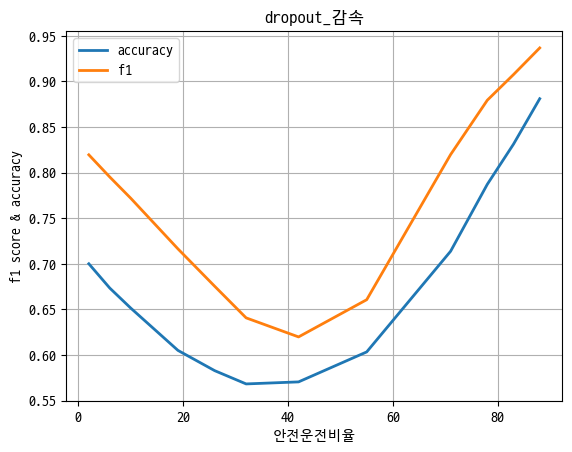

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family='D2Coding')
plt.title('dropout_감속')

plt.plot(d, accuracy, linewidth=2)
plt.plot(d, f1, linewidth=2)

plt.xlabel('안전운전비율')
plt.ylabel('f1 score & accuracy')

plt.grid(True)
plt.legend({'accuracy': accuracy, 'f1': f1})
plt.show()